In [4]:
from helper import *  
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #a library to make the data more structured

In [8]:
df = pd.read_csv("data/detik-clean-data.csv") #create data frame
text = df['summary']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list)

180
[['asti', 'gustiasih', 'menjadikan', 'keterbatasan', 'fisik', 'hambatan', 'berkarya', 'pegiat', 'daur', 'ulang', 'sampah', 'karyanya', 'tangan', 'pesohor'], ['arthur', 'leigh', 'welohr', 'wna', 'amerika', 'serikat', 'tega', 'menusuk', 'mati', 'mertuanya', 'kantor', 'imigrasi'], ['heboh', 'video', 'bullying', 'siswa', 'smp', 'cilacap', 'jateng', 'hangat', 'diperbincangkan', 'beredar', 'foto', 'siswa', 'smp', 'menginjak', 'kepala', 'temannya'], ['warga', 'dihebohkan', 'beredarnya', 'foto', 'siswa', 'smp', 'menginjak', 'kepala', 'temannya', 'sekolah', 'angkat', 'bicara', 'terkait'], ['pelajar', 'bandung', 'korban', 'sodomi', 'pria', 'percakapan', 'aplikasi', 'walla', 'polisi', 'kominfo', 'memblokir', 'aplikasi'], ['polisi', 'menggerebek', 'arena', 'permainan', 'adu', 'kemiri', 'muncang', 'area', 'pemakaman', 'digerebek', 'pejudi', 'kocar', 'kacir'], ['buah', 'kotak', 'amal', 'apotek', 'padayungan', 'kota', 'digondol', 'maling', 'aksi', 'terduga', 'pelaku', 'pencurian', 'terekam', 'kam

In [9]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [10]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<64 unique tokens: ['kepala', 'smp', 'warga', 'bandung', 'polisi']...>


In [11]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

180
[]


In [12]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

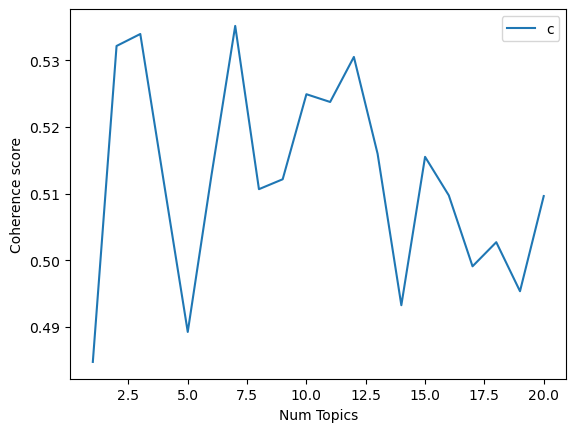

In [13]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [14]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.484782
Num Topics = 2  has Coherence Value of 0.532143
Num Topics = 3  has Coherence Value of 0.533939
Num Topics = 4  has Coherence Value of 0.51156
Num Topics = 5  has Coherence Value of 0.489279
Num Topics = 6  has Coherence Value of 0.512777
Num Topics = 7  has Coherence Value of 0.53515
Num Topics = 8  has Coherence Value of 0.510678
Num Topics = 9  has Coherence Value of 0.512163
Num Topics = 10  has Coherence Value of 0.524912
Num Topics = 11  has Coherence Value of 0.52375
Num Topics = 12  has Coherence Value of 0.530501
Num Topics = 13  has Coherence Value of 0.515979
Num Topics = 14  has Coherence Value of 0.493284
Num Topics = 15  has Coherence Value of 0.515523
Num Topics = 16  has Coherence Value of 0.509747
Num Topics = 17  has Coherence Value of 0.499116
Num Topics = 18  has Coherence Value of 0.502731
Num Topics = 19  has Coherence Value of 0.495379
Num Topics = 20  has Coherence Value of 0.509645


In [15]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=7) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.147*"jawa_barat" + 0.075*"jawa" + 0.073*"barat" + 0.066*"daerah" + 0.055*"perempuan" + 0.053*"bandung" + 0.045*"polisi" + 0.044*"jabar" + 0.041*"kabupaten" + 0.040*"mengungkap"
Topic: 1 Word: 0.094*"konser" + 0.086*"gegara" + 0.065*"masyarakat" + 0.057*"air" + 0.048*"smp" + 0.041*"acara" + 0.037*"daerah" + 0.030*"tewas" + 0.027*"tawang_kota" + 0.027*"tawang"
Topic: 2 Word: 0.071*"jalan" + 0.053*"motor" + 0.048*"kamil" + 0.048*"ridwan_kamil" + 0.048*"ridwan" + 0.047*"jabar" + 0.042*"kebakaran" + 0.032*"wilayah" + 0.029*"lantai" + 0.029*"sepeda"
Topic: 3 Word: 0.092*"warga" + 0.071*"ri" + 0.064*"lomba" + 0.059*"perlombaan" + 0.055*"rp" + 0.052*"polisi" + 0.051*"kemerdekaan" + 0.045*"ditangkap" + 0.035*"nama" + 0.032*"acara"
Topic: 4 Word: 0.134*"pria" + 0.065*"bandung" + 0.045*"mabuk" + 0.044*"jabar" + 0.042*"polisi" + 0.038*"warga" + 0.031*"jawa_barat" + 0.029*"air" + 0.028*"wilayah" + 0.027*"masjid"
Topic: 5 Word: 0.068*"kampung" + 0.064*"kabupaten" + 0.063*"kecamatan"

In [16]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2.csv")
print(df)

None


In [23]:
print("Corpus Length:", len(corpus_tfidf))

Corpus Length: 180


In [21]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim.html')

exception calling callback for <Future at 0x7f95df3b4410 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
ModuleNotFoundError: No module named 'pandas.core.indexes.numeric'
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/joblib/parallel.py", line 975, in retrieve
    self._output.extend(job.get(timeout=self.timeou

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.